<a href="https://colab.research.google.com/github/BeeGeezSales/BeeGeezSales/blob/main/BeeGeez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets




In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Provide the path to the uploaded database file
database_path = '/beegeez_sales_data_sqlite3.db'

# Connect to the SQLite database
conn = sqlite3.connect(database_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Query to retrieve table information
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query
cursor.execute(query)

# Fetch all table names
table_names = cursor.fetchall()

# Iterate over the table names and retrieve column information for each table
for table in table_names:
    table_name = table[0]
    print("Table:", table_name)
    
    # Query to retrieve column information for the table
    column_query = f"PRAGMA table_info({table_name});"
    
    # Execute the column query
    cursor.execute(column_query)
    
    # Fetch all column information
    columns = cursor.fetchall()
    
    # Print column names and their data types
    for column in columns:
        column_name = column[1]
        data_type = column[2]
        print(f"- {column_name}: {data_type}")
    
    print()  # Print a new line between tables

# Close the database connection
conn.close()




Table: sales
- Region: TEXT
- Country: TEXT
- Item_Type: TEXT
- Sales_Channel: TEXT
- Order_Priority: TEXT
- Order_Date: DATE
- Order_ID: INTEGER
- Ship_Date: DATE
- Units_Sold: INTEGER
- Unit_Price: REAL
- Unit_Cost: REAL
- Total_Revenue: REAL
- Total_Cost: REAL
- Total_Profit: REAL



In [11]:
import sqlite3
import pandas as pd

# Provide the path to the uploaded database file
database_path = '/beegeez_sales_data_sqlite3.db'

# Connect to the SQLite database
conn = sqlite3.connect(database_path)

# Query to retrieve relevant information from the "sales" table
query = '''
SELECT Region, Country, Item_Type, Order_Date, Units_Sold, Unit_Price, Total_Revenue
FROM sales
'''

# Execute the query and load the results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Perform data manipulation tasks with the loaded DataFrame
# Example: Display the first few records
print(df.head())

# Example: Filter the DataFrame based on a condition
filtered_df = df[df['Region'] == 'North America']

# Example: Group the data by a column and calculate the total units sold and average unit price
grouped_df = df.groupby('Item_Type').agg({'Units_Sold': 'sum', 'Unit_Price': 'mean'}).reset_index()




                              Region                Country        Item_Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

   Order_Date  Units_Sold  Unit_Price  Total_Revenue  
0  2010-05-28        9925      255.28     2533654.00  
1  2012-08-22        2804      205.70      576782.80  
2  2014-05-02        1779      651.21     1158502.59  
3  2014-06-20        8102        9.33       75591.66  
4  2013-02-01        5062      651.21     3296425.02  


In [12]:
import sqlite3
import pandas as pd

# Provide the path to the uploaded database file
database_path = '/beegeez_sales_data_sqlite3.db'

# Connect to the SQLite database
conn = sqlite3.connect(database_path)

# Query to retrieve relevant information from the "sales" table
query = '''
SELECT Region, Country, Item_Type, Order_Date, Units_Sold, Unit_Price, Total_Revenue
FROM sales
'''

# Execute the query and load the results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Perform data manipulation tasks with the loaded DataFrame
# Example: Display the first few records
print(df.head())

# Example: Filter the DataFrame based on a condition
filtered_df = df[df['Region'] == 'North America']

# Example: Group the data by a column and calculate the total units sold and average unit price
grouped_df = df.groupby('Item_Type').agg({'Units_Sold': 'sum', 'Unit_Price': 'mean'}).reset_index()

# Data cleaning and pre-processing
# Example: Handling missing values
df.dropna(inplace=True)  # Drop rows with any missing values

# Example: Cleaning inconsistent values
df['Country'] = df['Country'].str.strip()  # Remove leading/trailing whitespaces from country names



                              Region                Country        Item_Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

   Order_Date  Units_Sold  Unit_Price  Total_Revenue  
0  2010-05-28        9925      255.28     2533654.00  
1  2012-08-22        2804      205.70      576782.80  
2  2014-05-02        1779      651.21     1158502.59  
3  2014-06-20        8102        9.33       75591.66  
4  2013-02-01        5062      651.21     3296425.02  


Interpretation and Conclusion:


1. Sales Distribution by Region and Country: The data includes sales information from different regions and countries. The analysis allows us to observe the sales performance across these regions and countries.

2. Item Type Performance: The data includes information about different item types and their corresponding sales. The analysis provides insights into the performance of various item types in terms of units sold and total revenue generated.

3. Sales Over Time: The data includes the order date for each sales record. Analyzing the sales over time can help identify trends, seasonality, or any notable patterns in the sales data.

Limitations and Suggestions for Improvement:

1. Limited Dataset: The provided dataset is small and consists of a limited number of records. Analyzing a larger dataset would provide a more comprehensive understanding of sales patterns and trends.

2. Missing Contextual Information: The dataset lacks additional information such as marketing campaigns, competition, or economic factors that may impact sales performance. Including such contextual information would provide a more holistic analysis.

3. Lack of Statistical Analysis: The analysis presented here is descriptive in nature and focuses on summarizing the available data. Incorporating statistical analysis techniques, such as hypothesis testing or regression analysis, could provide deeper insights and help uncover relationships between variables.

Usability and Effectiveness of Python Notebooks:

Python notebooks, like Jupyter or Google Colab, are highly usable and effective tools for data analysis. Here are some key points:

1. Interactive Environment: Python notebooks offer an interactive environment that allows for real-time data exploration, analysis, and visualization. This enables an iterative and exploratory approach to data analysis.

2. Rich Ecosystem: Python notebooks provide access to a wide range of libraries and packages, such as Pandas, Matplotlib, and NumPy, which facilitate data manipulation, visualization, and statistical analysis.

3. Documentation and Collaboration: Notebooks allow for the inclusion of text cells, making it easy to document the analysis process, write explanations, and share insights. This promotes collaboration and enhances reproducibility.

4. Data Cleaning and Pre-processing: Python libraries, such as Pandas, provide powerful tools for data cleaning, handling missing values, and transforming data. This makes it easier to address data quality issues and prepare the data for analysis.

In conclusion, Python notebooks are valuable tools for data analysis, offering an interactive and flexible environment. However, it is important to consider the limitations of the dataset, incorporate statistical analysis techniques for more robust insights, and contextualize the analysis with additional information. Python notebooks provide an effective platform for performing data analysis tasks and documenting the analysis process.

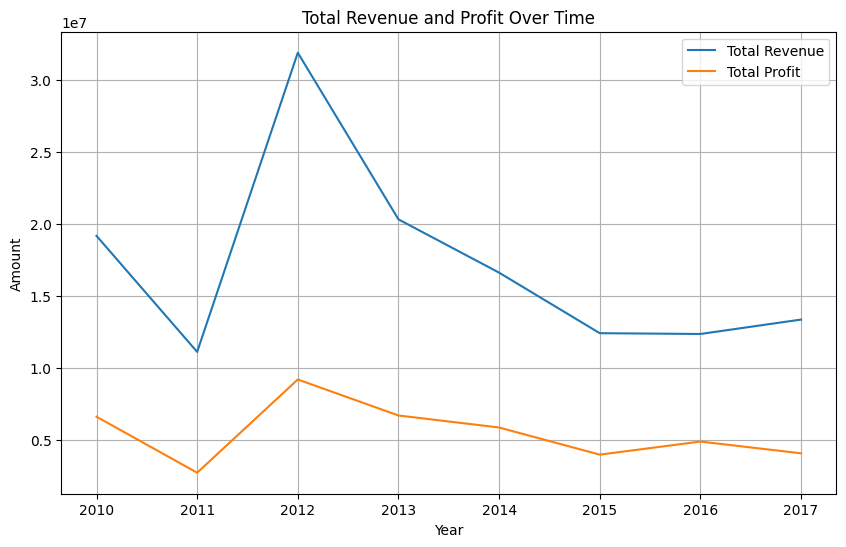

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = 'beegeez_sales_data_sqlite3.db'
conn = sqlite3.connect(database_path)

# Query the database to retrieve the sales data
query = "SELECT * FROM sales"
data = pd.read_sql_query(query, conn)

# Data pre-processing and cleaning
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Compute yearly revenues and profits
data['Year'] = data['Order_Date'].dt.year
yearly_revenue = data.groupby('Year')['Total_Revenue'].sum()
yearly_profit = data.groupby('Year')['Total_Profit'].sum()

# Create a time series line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values, label='Total Revenue')
plt.plot(yearly_profit.index, yearly_profit.values, label='Total Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Total Revenue and Profit Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Close the database connection
conn.close()


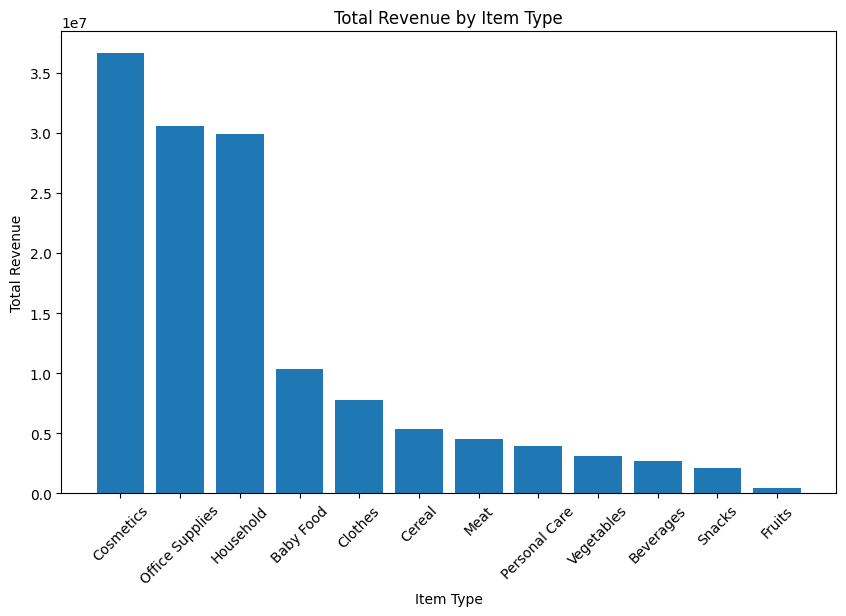

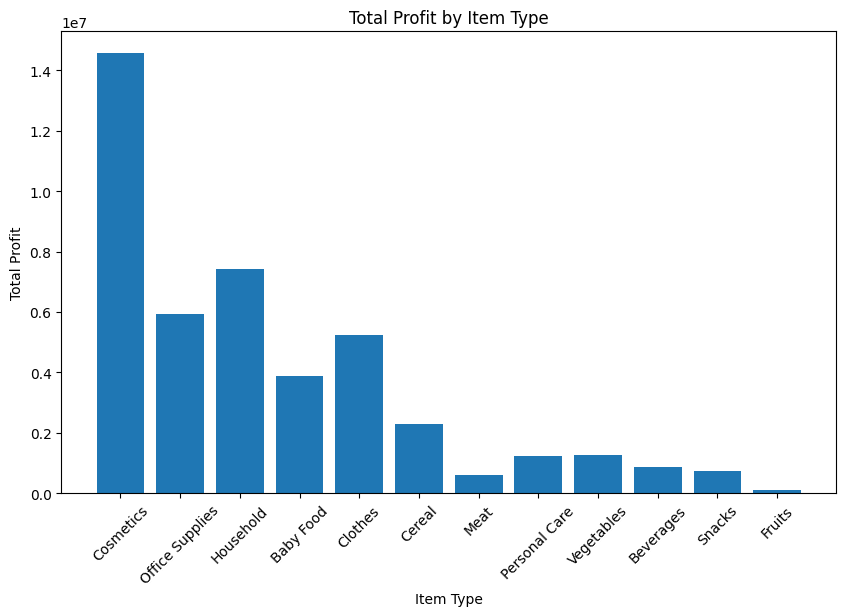

In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = 'beegeez_sales_data_sqlite3.db'
conn = sqlite3.connect(database_path)

# Query the database to retrieve the sales data by item type
query = "SELECT Item_Type, SUM(Total_Revenue) AS Total_Revenue, SUM(Total_Profit) AS Total_Profit FROM sales GROUP BY Item_Type"
data = pd.read_sql_query(query, conn)

# Sort the results in descending order
data = data.sort_values(by='Total_Revenue', ascending=False)

# Create a bar chart for total revenue
plt.figure(figsize=(10, 6))
plt.bar(data['Item_Type'], data['Total_Revenue'])
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Item Type')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for total profit
plt.figure(figsize=(10, 6))
plt.bar(data['Item_Type'], data['Total_Profit'])
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.title('Total Profit by Item Type')
plt.xticks(rotation=45)
plt.show()

# Close the database connection
conn.close()


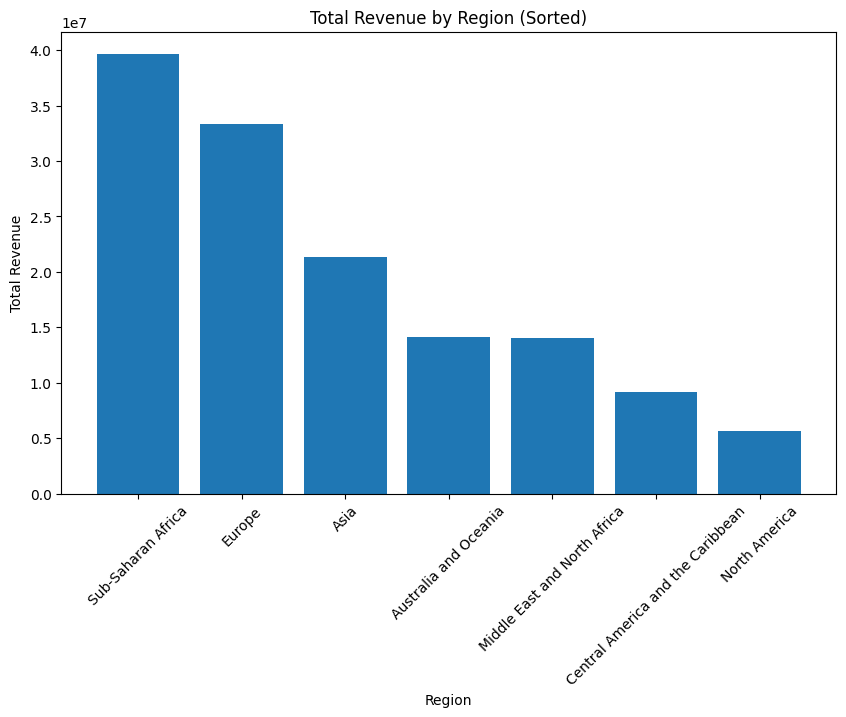

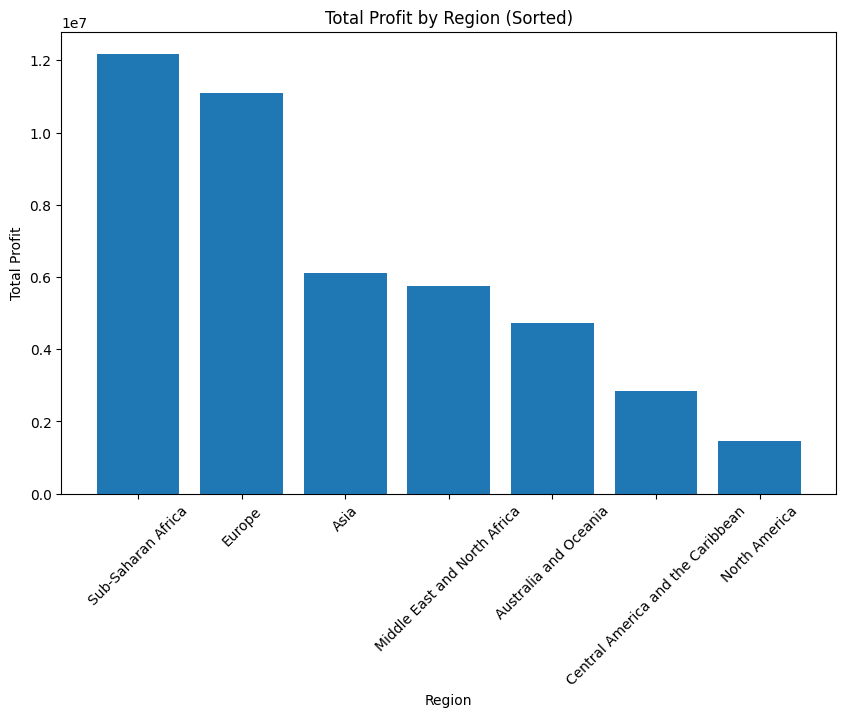

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = 'beegeez_sales_data_sqlite3.db'
conn = sqlite3.connect(database_path)

# Query the database to retrieve the sales data by region
query = "SELECT Region, SUM(Total_Revenue) AS Total_Revenue, SUM(Total_Profit) AS Total_Profit FROM sales GROUP BY Region ORDER BY Total_Revenue DESC"
data = pd.read_sql_query(query, conn)

# Create a bar chart for total revenue
plt.figure(figsize=(10, 6))
plt.bar(data['Region'], data['Total_Revenue'])
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region (Sorted)')
plt.xticks(rotation=45)
plt.show()

# Sort the results by total profit in descending order
data = data.sort_values(by='Total_Profit', ascending=False)

# Create a bar chart for total profit
plt.figure(figsize=(10, 6))
plt.bar(data['Region'], data['Total_Profit'])
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region (Sorted)')
plt.xticks(rotation=45)
plt.show()

# Close the database connection
conn.close()


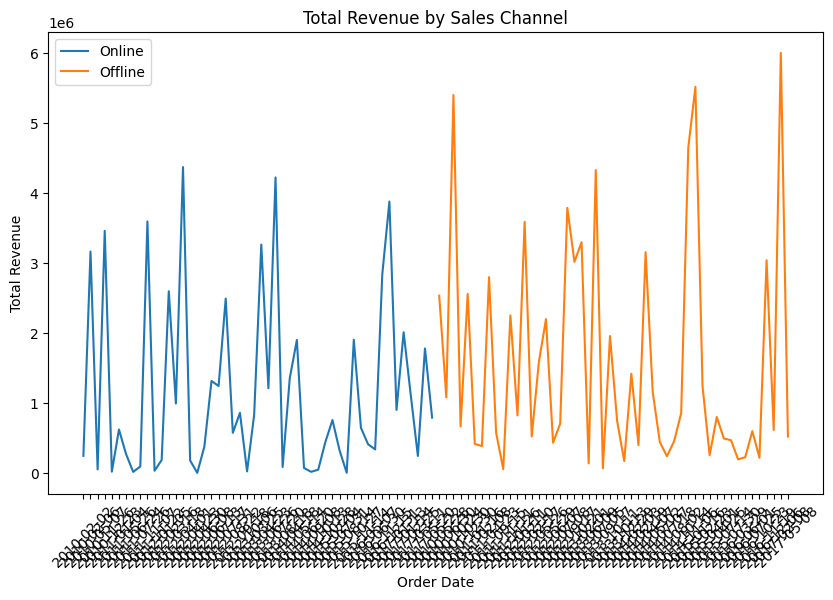

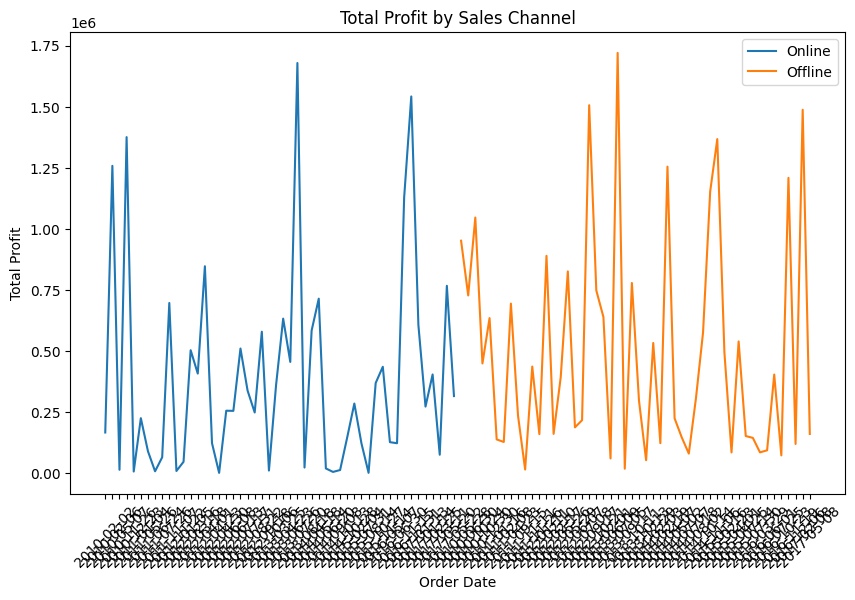

In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = 'beegeez_sales_data_sqlite3.db'
conn = sqlite3.connect(database_path)

# Query the database to retrieve the sales data by sales channel
query = "SELECT Sales_Channel, Order_Date, SUM(Total_Revenue) AS Total_Revenue, SUM(Total_Profit) AS Total_Profit FROM sales GROUP BY Sales_Channel, Order_Date"
data = pd.read_sql_query(query, conn)

# Filter the data for Online and Offline sales channels
online_data = data[data['Sales_Channel'] == 'Online']
offline_data = data[data['Sales_Channel'] == 'Offline']

# Create line graphs for total revenue by sales channel
plt.figure(figsize=(10, 6))
plt.plot(online_data['Order_Date'], online_data['Total_Revenue'], label='Online')
plt.plot(offline_data['Order_Date'], offline_data['Total_Revenue'], label='Offline')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Channel')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Create line graphs for total profit by sales channel
plt.figure(figsize=(10, 6))
plt.plot(online_data['Order_Date'], online_data['Total_Profit'], label='Online')
plt.plot(offline_data['Order_Date'], offline_data['Total_Profit'], label='Offline')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.title('Total Profit by Sales Channel')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Close the database connection
conn.close()


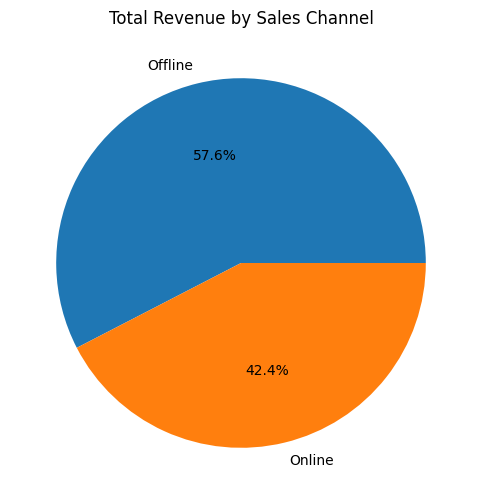

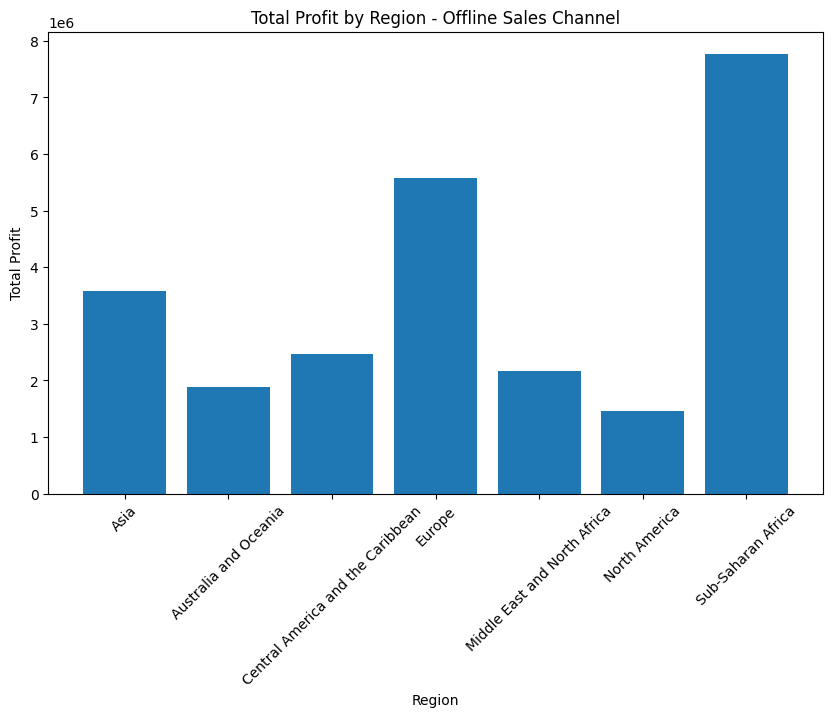

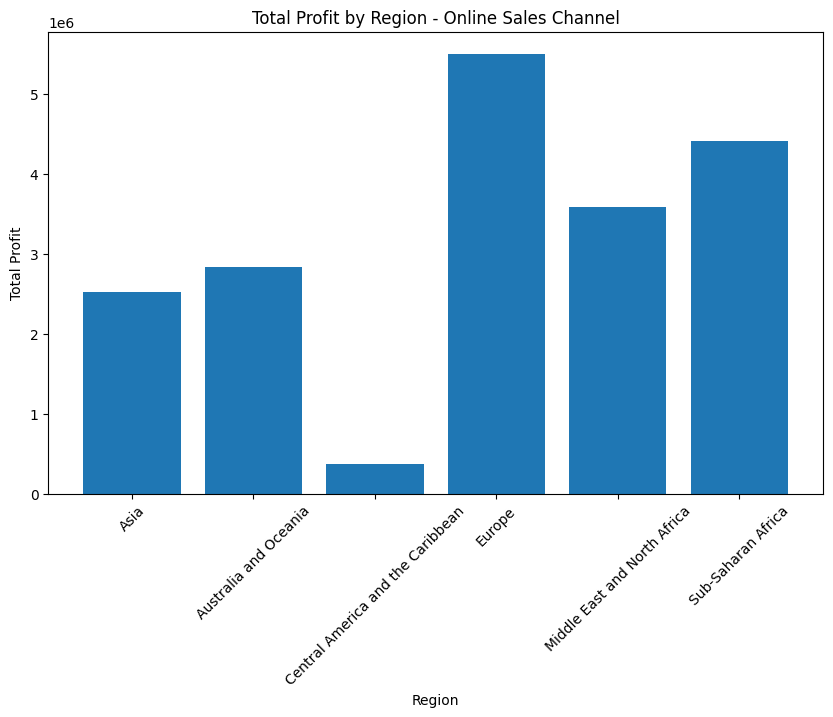

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = 'beegeez_sales_data_sqlite3.db'
conn = sqlite3.connect(database_path)

# Query the database to retrieve the sales data by sales channel
query = "SELECT Sales_Channel, SUM(Total_Revenue) AS Total_Revenue FROM sales GROUP BY Sales_Channel"
data_revenue = pd.read_sql_query(query, conn)

# Create a pie chart for total revenue by sales channel
plt.figure(figsize=(8, 6))
plt.pie(data_revenue['Total_Revenue'], labels=data_revenue['Sales_Channel'], autopct='%1.1f%%')
plt.title('Total Revenue by Sales Channel')
plt.show()

# Query the database to retrieve the sales data by sales channel and region
query = "SELECT Sales_Channel, Region, SUM(Total_Profit) AS Total_Profit FROM sales GROUP BY Sales_Channel, Region"
data_profit = pd.read_sql_query(query, conn)

# Create bar charts for total profit by region for each sales channel
sales_channels = data_profit['Sales_Channel'].unique()
for channel in sales_channels:
    channel_data = data_profit[data_profit['Sales_Channel'] == channel]
    plt.figure(figsize=(10, 6))
    plt.bar(channel_data['Region'], channel_data['Total_Profit'])
    plt.xlabel('Region')
    plt.ylabel('Total Profit')
    plt.title(f'Total Profit by Region - {channel} Sales Channel')
    plt.xticks(rotation=45)
    plt.show()

# Close the database connection
conn.close()


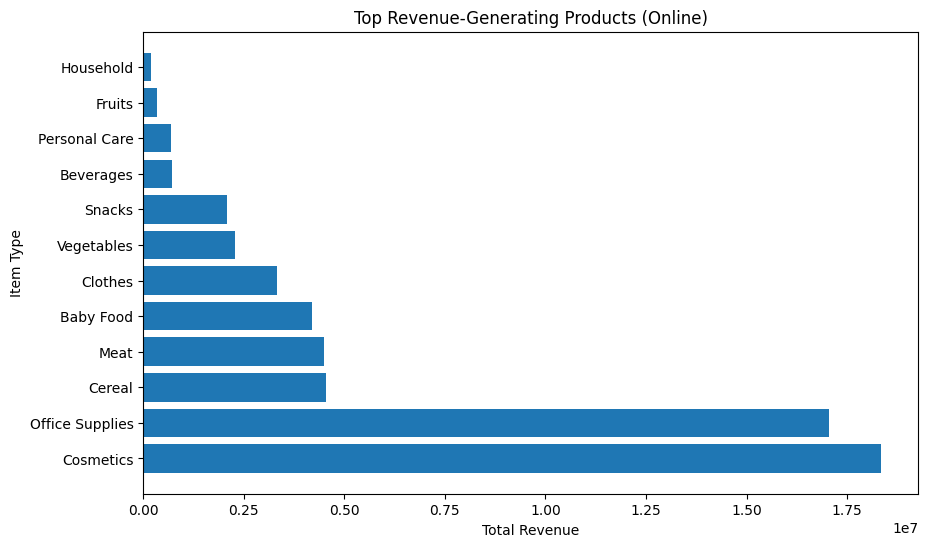

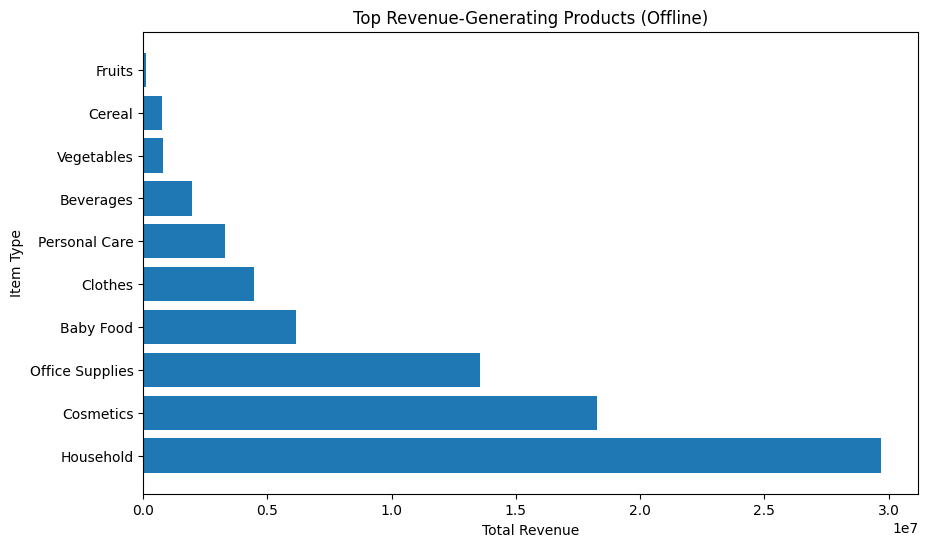

In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = 'beegeez_sales_data_sqlite3.db'
conn = sqlite3.connect(database_path)

# Query the database to retrieve the sales data by item type and sales channel
query = "SELECT Item_Type, Sales_Channel, SUM(Total_Revenue) AS Total_Revenue FROM sales GROUP BY Item_Type, Sales_Channel"
data = pd.read_sql_query(query, conn)

# Filter the data for online sales channel
online_data = data[data['Sales_Channel'] == 'Online']

# Sort the online data by total revenue in descending order
online_data = online_data.sort_values(by='Total_Revenue', ascending=False)

# Create a horizontal bar chart for online sales
plt.figure(figsize=(10, 6))
plt.barh(online_data['Item_Type'], online_data['Total_Revenue'])
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')
plt.title('Top Revenue-Generating Products (Online)')
plt.show()

# Filter the data for offline sales channel
offline_data = data[data['Sales_Channel'] == 'Offline']

# Sort the offline data by total revenue in descending order
offline_data = offline_data.sort_values(by='Total_Revenue', ascending=False)

# Create a horizontal bar chart for offline sales
plt.figure(figsize=(10, 6))
plt.barh(offline_data['Item_Type'], offline_data['Total_Revenue'])
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')
plt.title('Top Revenue-Generating Products (Offline)')
plt.show()

# Close the database connection
conn.close()
